Исследуем датасет на предмет качества, достаточности данных. Формулируем предположения о бизнес-задаче, которую можно решить с помощью предложенных данных, заказчиках/пользователях отчета, их ожиданиях, системе метрик на основании датасета.
Проводим анализ данных доступными инструментами (Excel, Python (если изучали до данного курса) и т.д.).
Строим дашборд (или макет дашборда, если на данный момент не изучили BI-инструменты) в доступном вам инструменте (Excel, Google Data Studio, Power BI и др.)


Дашборд с объяснением почему взяли именно такие метрики и что они дадут бизнес-заказчику (и какому бизнес-заказчику: маркетологу, финдиру, гендиру и т.д.)
· Пояснительную записку, содержащую:

1. аргументированное описание примененного подхода к анализу данных, ограничения и допущения, выявленные в ходе работы с датасетом;

2.  описание бизнес-заказчика и его гипотетических болей и целей развития текущего бизнеса; 

3. описание гипотез, которые вы проверяете с помощью освоенного инструментария и влияние на бизнес-цели, сформулированные выше

#####                            ОПИСАНИЕ
есть интернет магазин, осуществляющий продажу товаров по всему миру. Имеются накопленные за ???лет данные по продажам
Бизнес цель - Требуется увеличть выручку и конверсию продаж, для чего:
1. определить страны, формирующих 80% всей выручки и вывести на мониторинг из них топ-5
        - гипотеза: меньше 50% из перечня стран формируют 80% всей выручки
        - бизнес-заказчик: финдиректор
        - метрика: объем выручки 50% и более (мониторинг стран, генерирующих этот объем)
        - мониторинг позволит сконцентрироваться на ключевых точках приносящих основную выручку компании, снизить               риски финансовой не устойчивости(за счет своевременного вмешательства при изменении метрики), улучшать                 существующий канал прибыли и анализировать фин диру те страны, где выручка низкая (с точки зрения законов/             налогов/комиссий)

2. определить топ-10 стран, откуда больше всего клиентов (покупателей):
        - гипотеза: топ-10 стран с наибольшим количеством покупателей не будет совпадать с топ-10 стран, формирующих             максимальную выручку. выявить эти страны
        - бизнес-заказчик: маркетинг, гендиректор
        - метрика: количество клиентов 50%  более (топ-10 стран с максимальным количеством покупателей)
        - данная метрика позволит видить максимальный клиентский трафик, который путем маркетинговых акций/новых                 продуктов и бизнес-схем (поэтому гендир) повысит выручку по этим странам и компании

3. определить наличие/отсутствие сезонности продаж (какое распределение продаж по годам и месяцам). Вывести на дашборт топ-5 стран с сезонной активностью в продажах и месяца (сезоны) пиковых продаж.
        - гипотеза: сезонность влияет на продажи по всем категориям товара и во всех странах
        - бизнес-заказчик: маркетинг
        - метрика: топ-5 стран, где максимальное сезонность продаж
        - метрика: месяца сезонности продаж
        - мониторинг данных метрик позволит повысить конверсию продаж по году в целом, анализировать виды товаров в             сезоны и делать экономию на заблаговременной закупке (заказом) данных товаров, строить маркетинговые акции и           специальные предложения/распродажи

Для проверки перечисленных выше гипотез используем данные о продажах интернет магазина.
План действий:
1. читаем датасет

2. готовим данные (проводим преобразование в другой тип (например object в float), работаем с пропусками (удаляем или заменяем), смотрим на наличие выбросов)

3. проводим исследование данных на предмет проверки гипотез, делаем вывод 

4. готовим датасет для реализации (визуализация и вычисления) указанных выше требований

5. визуализируем данные (строим дашборд мониторинга 3-ех метрик (1)топ-5 стран формирующих максимальную выручку, 2)топ-10 стран с максимальным количеством покупателей,  3) месяца сезонности продаж)

6. формулируем выводы.

7. Формулируем рекомендации.

In [221]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

In [222]:
# читаем датасет продаж интернет магазина
data = pd.read_csv('Метрики_гипот_(AIC)итоговой_работы.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,"2,75",17850.0,United Kingdom


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    54214 non-null  object 
 1   StockCode    54214 non-null  object 
 2   Description  54080 non-null  object 
 3   Quantity     54214 non-null  int64  
 4   InvoiceDate  54214 non-null  object 
 5   UnitPrice    54214 non-null  object 
 6   CustomerID   40643 non-null  float64
 7   Country      54214 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ MB


In [224]:
print(len(data[data['CustomerID']<0]))
print(data.CustomerID.isna().sum())

0
13571


In [56]:
data.UnitPrice.isna().sum()


0

In [57]:
data[data['CustomerID']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [58]:
data[data['UnitPrice'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Изучаем данные, смотрим тип данных, полноту (наличие пропусков, nan), выбросы, колличественный и смысловой состав

In [225]:
# смотрим какие данные есть. Для выполнения бизнес-требований нам надо создать столбец
# с суммой продаж (UnitPrice*Quantity). Видим что в Quantity есть отрицательные значения, при этом в описании товара
# нет признаков что это возврат или скидка или акция, предполагаем что это ошибки ввода данных и будем исправлять 
# умножив на -1 
data[(data['UnitPrice']!='0') & (data['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
19,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,"4,65",15311.0,United Kingdom
30,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,"0,29",17548.0,United Kingdom
31,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/10 10:24,"0,29",17548.0,United Kingdom
202,C536548,20957,PORCELAIN HANGING BELL SMALL,-1,12/1/10 14:33,"1,45",12472.0,Germany
375,C536642,21463,MIRRORED DISCO BALL,-1,12/2/10 11:56,"5,95",14390.0,United Kingdom
...,...,...,...,...,...,...,...,...
53704,C581229,79191C,RETRO PLASTIC ELEPHANT TRAY,-24,12/8/11 10:14,"0,85",12558.0,USA
53705,C581229,21507,ELEPHANT BIRTHDAY CARD,-12,12/8/11 10:14,"0,42",12558.0,USA
53765,C581322,22666,RECIPE BOX PANTRY YELLOW DESIGN,-1,12/8/11 11:51,"2,95",18223.0,United Kingdom
53770,C581330,22959,WRAP CHRISTMAS VILLAGE,-25,12/8/11 11:57,"0,42",15877.0,United Kingdom


In [226]:
# убираем отрицательные значения в колонке Quantity
#data[data['Quantity']<0]*=-1
data['Quantity']=data['Quantity'].abs()

In [227]:
# проверяем
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [228]:
print(len(data[data['CustomerID']<0]))
print(data.CustomerID.isna().sum())

0
13571


In [229]:
# смотрим тип данных по колонкам и наличие пропусков (nan). колонки UnitPrice и Quantity нам потребуются 
# для дальнейших вычислений и требуется преобразовать их в числовой тип, в колонках Description и CustomerID 
# есть пропуски с которыми будем решать что делать
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    54214 non-null  object 
 1   StockCode    54214 non-null  object 
 2   Description  54080 non-null  object 
 3   Quantity     54214 non-null  int64  
 4   InvoiceDate  54214 non-null  object 
 5   UnitPrice    54214 non-null  object 
 6   CustomerID   40643 non-null  float64
 7   Country      54214 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ MB


In [230]:
# смотрим столбец UnitPrice на наличие нулей, пропусков и отрицательных значений
# решаемая задача это выручка, поэтому строки с значением 0 нам не нужны, будем их удалять
data[data['UnitPrice']=='0']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
204,536553,37461,NaN,3,12/1/10 14:35,0,NaN,United Kingdom
730,536995,35951,NaN,57,12/3/10 15:29,0,NaN,United Kingdom
731,536998,85067,NaN,6,12/3/10 15:30,0,NaN,United Kingdom
732,537005,21692,NaN,70,12/3/10 15:35,0,NaN,United Kingdom
733,537009,84534B,NaN,80,12/3/10 15:38,0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
51508,579743,21810,check,135,11/30/11 14:36,0,NaN,United Kingdom
52171,580359,20775,NaN,35,12/2/11 16:11,0,NaN,United Kingdom
53536,581207,21688,mixed up,337,12/7/11 18:34,0,NaN,United Kingdom
53537,581209,21620,NaN,6,12/7/11 18:35,0,NaN,United Kingdom


In [231]:
# преобразуем тип данных колонки UnitPrice в float64
for i in range(len(data)):
    data.loc[i,'UnitPrice']=data.loc[i,'UnitPrice'].replace(',','.')

data['UnitPrice']

0        3.39
1        1.69
2        5.95
3        4.95
4        2.75
         ... 
54209    0.85
54210    2.08
54211    0.42
54212    1.95
54213    4.15
Name: UnitPrice, Length: 54214, dtype: object

In [232]:
data['UnitPrice']=pd.to_numeric(data['UnitPrice'])

In [233]:
data[data['UnitPrice'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [234]:
print(len(data[data['CustomerID']<0]))
print(data.CustomerID.isna().sum())

0
13571


In [235]:
# удаляем строки с 0

data= data.drop(data[data.UnitPrice==0].index)

In [236]:
# проверяем
#data[data['UnitPrice']==0]
#data[data['UnitPrice']<0]
data[data['UnitPrice'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [237]:
# проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53989 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    53989 non-null  object 
 1   StockCode    53989 non-null  object 
 2   Description  53989 non-null  object 
 3   Quantity     53989 non-null  int64  
 4   InvoiceDate  53989 non-null  object 
 5   UnitPrice    53989 non-null  float64
 6   CustomerID   40639 non-null  float64
 7   Country      53989 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.7+ MB


In [238]:
# смотрим пропуски в столбцах Description и CustomerID

data['Description'].isna().sum()

0

In [239]:
print(data.CustomerID.isna().sum())

13350


In [240]:
# пропусков по CustomerID большое количество - 13350 шт. Предполагаем, что это валидные пользователи 
# которые оплачивали заказы не картой, а другим способом и их влияние на выручку значимо
# заменим NaN на условное число -1 (в дальнейшем будет выделена в отдельную группа для анализа)
data[data['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
158,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,12/1/10 14:32,2.51,NaN,United Kingdom
159,536544,21870,I CAN ONLY PLEASE ONE PERSON MUG,1,12/1/10 14:32,3.36,NaN,United Kingdom
160,536544,21879,HEARTS GIFT TAPE,1,12/1/10 14:32,1.66,NaN,United Kingdom
161,536544,21928,JUMBO BAG SCANDINAVIAN PAISLEY,1,12/1/10 14:32,4.21,NaN,United Kingdom
162,536544,22069,BROWN PIRATE TREASURE CHEST,1,12/1/10 14:32,3.36,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
54161,581498,48138,DOORMAT UNION FLAG,1,12/9/11 10:26,14.13,NaN,United Kingdom
54162,581498,82482,WOODEN PICTURE FRAME WHITE FINISH,4,12/9/11 10:26,4.96,NaN,United Kingdom
54163,581498,84032A,CHARLIE+LOLA PINK HOT WATER BOTTLE,4,12/9/11 10:26,5.79,NaN,United Kingdom
54164,581498,84558a,3D DOG PICTURE PLAYING CARDS,1,12/9/11 10:26,5.79,NaN,United Kingdom


In [241]:
# заменим на -1
data['CustomerID'].fillna(-1, inplace=True)

In [242]:
print(len(data[data['CustomerID']<0]))
print(data.CustomerID.isna().sum())

13350
0


In [243]:
# создаем столбец с выручкой   
data['many_cuntry']=data['Quantity']*data['UnitPrice']
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,many_cuntry
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,5.95,13047.0,United Kingdom,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,4.95,13047.0,United Kingdom,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,2.75,17850.0,United Kingdom,22.00
...,...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,12/9/11 12:31,0.85,15804.0,United Kingdom,20.40
54210,581585,23084,RABBIT NIGHT LIGHT,12,12/9/11 12:31,2.08,15804.0,United Kingdom,24.96
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,12/9/11 12:31,0.42,15804.0,United Kingdom,10.50
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/11 12:50,1.95,12680.0,France,23.40


In [244]:
# проверяем
#data[data['many_cuntry']==0]
#data[data['many_cuntry']<0]
data[data['many_cuntry'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,many_cuntry


In [245]:
# проверяем подготовленный датасет для проведения исследования, проверки гипотез и построения дашборда
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53989 entries, 0 to 54213
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    53989 non-null  object 
 1   StockCode    53989 non-null  object 
 2   Description  53989 non-null  object 
 3   Quantity     53989 non-null  int64  
 4   InvoiceDate  53989 non-null  object 
 5   UnitPrice    53989 non-null  float64
 6   CustomerID   53989 non-null  float64
 7   Country      53989 non-null  object 
 8   many_cuntry  53989 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


In [246]:
# записываем файл для последующей реализации дашборда
data.to_csv('/Users/alex/Desktop/tableo/data.csv',index=False)

определяем страны, формирующих 80% всей выручки и выводим из них топ-5
 - гипотеза: меньше 50% из перечня стран формируют 80% всей выручки

In [247]:
# всего стран, откуда осуществляються покупки
len(data.Country.unique())

37

In [248]:
# определяем сумму выручки и количество проданного товара по всем странам 
pr=data['many_cuntry'].sum()
product=data['Quantity'].sum()
print('количество товара: ',product)
print('выручка: ', pr)

количество товара:  566328
выручка:  1112240.091


In [249]:
# группируем по странам и сортируем по убыванию выручку
df_cuntry=data.groupby('Country').agg(sum).sort_values('many_cuntry', ascending=False)

#df_cuntry=data.groupby(['Country','CustomerID'])['many_cuntry'].agg(['sum','count']).sort_values(by='sum',ascending=False)

df_cuntry=df_cuntry[['Quantity','many_cuntry']]    # выручка и количество товара по странам
df_cuntry.head()

,Quantity,many_cuntry
Country,,
United Kingdom,469211,939628.821
EIRE,14765,30574.080
Netherlands,20943,26710.580
Germany,12443,24893.120
France,11742,20149.970


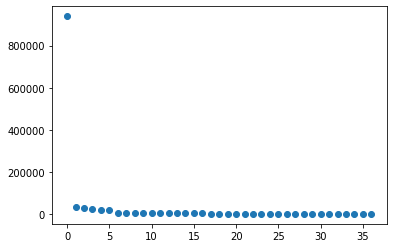

In [250]:
# посмотрим наличие выбросов или неоднородностей в распределении выручки по странам. Посторим точечный график
plt.scatter(x=range(len(df_cuntry['many_cuntry'])),y=df_cuntry['many_cuntry'])

Видим что основной (более 80%) объем (количество) товара и выручка приходяться на United Kingdom. Считаем это валидным выбросом и исключим его из генеральной совокупности для проведения анализа среди других стран

In [251]:
df_cuntry_new=df_cuntry.drop(index=(['United Kingdom']))
df_cuntry_new.head()

,Quantity,many_cuntry
Country,,
EIRE,14765,30574.08
Netherlands,20943,26710.58
Germany,12443,24893.12
France,11742,20149.97
Australia,10045,17240.22


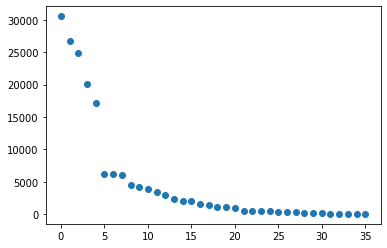

In [252]:
# Посторим точечный график
plt.scatter(x=range(len(df_cuntry_new['many_cuntry'])),y=df_cuntry_new['many_cuntry'])

In [253]:
# определяем сумму выручки и количество проданного товара по всем странам (после исключения United Kingdom)
pr_new=df_cuntry_new['many_cuntry'].sum()
product_new=df_cuntry_new['Quantity'].sum()
print('количество товара: ',product_new)
print('выручка: ', pr_new)

количество товара:  97117
выручка:  172611.2700000001


In [292]:
# определяем страны с максимальной выручкой в сумме дающих 80% всей выручки компании
k=0

for n in range(len(df_cuntry_new)):
    if (k+df_cuntry_new['many_cuntry'][n])<=pr_new*(0.8):
        k+=df_cuntry_new['many_cuntry'][n]
    else:
        print(df_cuntry_new['many_cuntry'][n], k)
        break
    
    
  

4557.790000000002 137901.85000000003


Вывод: гипотеза что меньше 50% стран формируют 80% всей выручки подтвердилась исследованием данных. более 80 % всей выручки генерирует одна страна - United Kingdom. из оставшихся 36 стран 80% выручки создают только 9ть стран (на точечном графике так же это видно). На дашборд будем выводить для мониторинга эти 10-ть стран как ключевые точки формирования 97% всей выручки интернет магазина

In [255]:
# топ-10 стран, формирующих 97% всей выручки интернет магазина
df_cuntry_top10=df_cuntry.head(10)
df_cuntry_top10=df_cuntry_top10.reset_index()
df_cuntry_top10

,Country,Quantity,many_cuntry
0,United Kingdom,469211,939628.821
1,EIRE,14765,30574.080
2,Netherlands,20943,26710.580
3,Germany,12443,24893.120
4,France,11742,20149.970
5,Australia,10045,17240.220
6,Switzerland,3543,6222.500
7,Sweden,4680,6124.520
8,Spain,2938,5986.860
9,Portugal,1832,4557.790


In [256]:
# записываем файл для последующей реализации дашборда
df_cuntry_top10.to_csv('/Users/alex/Desktop/tableo/df_cuntry_top10.csv',index=False)

определить топ-10 стран, откуда больше всего клиентов (покупателей):
 - гипотеза: топ-10 стран с наибольшим количеством покупателей не будет совпадать с топ-10 стран, формирующих             максимальную выручку. выявить эти страны

In [257]:
df_customer=data.groupby('Country').count().sort_values('CustomerID', ascending=False)
df_customer=df_customer['CustomerID']
df_customer=df_customer.head(10)
df_customer=df_customer.reset_index()
df_customer

,Country,CustomerID
0,United Kingdom,49378
1,Germany,951
2,France,881
3,EIRE,787
4,Spain,253
5,Netherlands,234
6,Belgium,211
7,Switzerland,189
8,Portugal,152
9,Australia,130


Вывод: гипотеза что топ-10 стран с наибольшим количеством покупателей не будет совпадать с топ-10 стран подтвердилась
    объем выручки не имеет линейную зависимость от количества покупателей

In [258]:
# записываем файл для последующей реализации дашборда
df_customer.to_csv('/Users/alex/Desktop/tableo/df_customer.csv',index=False)

определить наличие/отсутствие сезонности продаж (какое распределение продаж по годам и месяцам). 
 - гипотеза: сезонность влияет на продажи по всем категориям товара и во всех странах

In [259]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,many_cuntry
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,5.95,13047.0,United Kingdom,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,4.95,13047.0,United Kingdom,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,2.75,17850.0,United Kingdom,22.00
...,...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,12/9/11 12:31,0.85,15804.0,United Kingdom,20.40
54210,581585,23084,RABBIT NIGHT LIGHT,12,12/9/11 12:31,2.08,15804.0,United Kingdom,24.96
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,12/9/11 12:31,0.42,15804.0,United Kingdom,10.50
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/11 12:50,1.95,12680.0,France,23.40


In [260]:
# преобразуем тип колонки InvoiceDate в дату
data.InvoiceDate=pd.to_datetime(data.InvoiceDate, format='%m/%d/%y %H:%M')

In [261]:
# создадим колонки месяц и год
data['month']=pd.DatetimeIndex(data.InvoiceDate).month
data['yaer']=pd.DatetimeIndex(data.InvoiceDate).year

In [262]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,many_cuntry,month,yaer
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,12,2010
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85,12,2010
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85,12,2010
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom,22.00,12,2010


In [263]:
data.yaer.unique()

array([2010, 2011])

In [270]:
df_seazon=data.groupby(['yaer','month']).agg(sum).sort_values(by='many_cuntry',ascending=False )
df_seazon

Quantity  UnitPrice   CustomerID  many_cuntry
yaer month                                               
2011 11        83439  34234.050  102232220.0   162891.240
     10        63664  24022.680   75515424.0   117721.050
     9         58856  17851.301   62659609.0   107561.401
     8         46656  19066.330   43512890.0    89977.960
     5         38246  22292.040   43797322.0    86225.440
2010 12        35680  19314.580   41723987.0    82586.720
2011 3         38533  19213.090   41916656.0    80830.180
     7         41201  16892.750   41101639.0    79266.680
     6         40823  14752.160   42090964.0    79196.960
     1         33072  12848.090   33594259.0    67922.680
     4         29372  12270.930   34415698.0    54151.210
     2         30733  12454.940   31574423.0    53537.120
     12        26053   8305.240   26956192.0    50371.450

In [265]:
# учитывая что в 2010 году только один месяц и вцелом данных для исследования на наличие сезонности недостаточно
# удалим эту строку и посмотрим зависимость выручки по месяцам в 2011 году
df_seazon_new=data[data.yaer!=2010]
df_seazon_new=df_seazon_new.groupby('month').agg(sum).sort_values(by='month',ascending=False )
df_seazon_new1=df_seazon_new['many_cuntry']
df_seazon_new1=df_seazon_new1.reset_index()
df_seazon_new1

,month,many_cuntry
0,12,50371.450
1,11,162891.240
2,10,117721.050
3,9,107561.401
4,8,89977.960
5,7,79266.680
6,6,79196.960
7,5,86225.440
8,4,54151.210
9,3,80830.180


<BarContainer object of 12 artists>

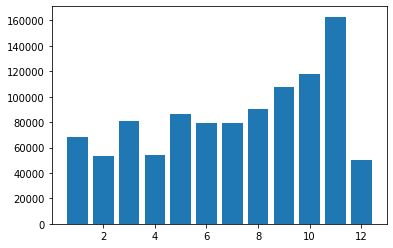

In [269]:
plt.bar(df_seazon_new.index, df_seazon_new['many_cuntry'])

In [267]:
# записываем файл для последующей реализации дашборда
df_seazon_new1.to_csv('/Users/alex/Desktop/tableo/df_seazon_new1.csv',index=False)

Выводы:
1.	Анализ показал не достаточность данных (не полноту) для определения наличия или отсутствия сезонности в продажах
2.	Анализ выявил явное  преобладание (более 80% от общего объема) в выручке и количестве клиентов интернет магазина страны UK
3.	Анализ показал большое количество (133350) не идентифицированных клиентов из  UK, осуществлявших покупки.
4.	Выявлена взаимозависимость объема продаж и количества клиентов
5.	Анализ позволил выделить ограниченное количество стран (ТОП-10), которые формируют 97% всего объема продаж. Это позволит сконцентрироваться на меньшем количестве стран для повышения выручки
6.	Выведенный мониторинг количества клиентов по странам позволит увидеть страны с меньшим объемом выручки, но большим количеством клиентов, которых можно будет стимулировать на больший средний чек или количество покупок
7.	выявлено что меньшее количество клиентов формирует больший объем выручки из Нидерландов.


Рекомендации:
1.	обогатить данные по продажам за предыдущие периоды для определения сезонности в продажах
2.	идентифицировать через другие источники покупателей из UK
3.	провести анализ структуры продаж внутри выборки по одной стране UK 
4.	провести анализ покупательной способности клиентов из Германии и Франции с точки зрения повышения среднего чека

